In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/done.csv')  # atau coba 'ISO-8859-1'
df.head()

,id,source,created_at,preprocessed_text,sentimen,skor_sentimen
0,1,x,2025-06-16,gusy mending sunscreen amaterasun buat normal,neutral,0.987218
1,10,x,2025-06-15,physical sunscreen amaterasun pakai sekali gn...,neutral,0.987875
2,15,x,2025-06-14,amaterasun sunscreen serum melindungj rusa kul...,neutral,0.801552
3,18,x,2025-06-14,gororow huftbosan amaterasun physical sunscreen,neutral,0.964037
4,19,x,2025-06-13,ohmy beautybank tahun kemarin udah ngurangin s...,neutral,0.513189


In [ ]:
# Cek kolom yang tersedia
print(df.columns)

Index(['id', 'source', 'created_at', 'preprocessed_text', 'sentimen',
       'skor_sentimen'],
      dtype='object')


In [ ]:
# Cek nilai unik di target
print(df['sentimen'].value_counts())

sentimen
positive    381
neutral     198
negative     10
Name: count, dtype: int64


In [ ]:
# Pisahkan fitur dan target
X_text = df['preprocessed_text']
y = df['sentimen']

In [ ]:
# Ubah teks menjadi vektor angka
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi dan training model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Prediksi dan evaluasi
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

Akurasi: 0.7458
Precision: 0.7573
Recall: 0.7458
F1-score: 0.7091


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


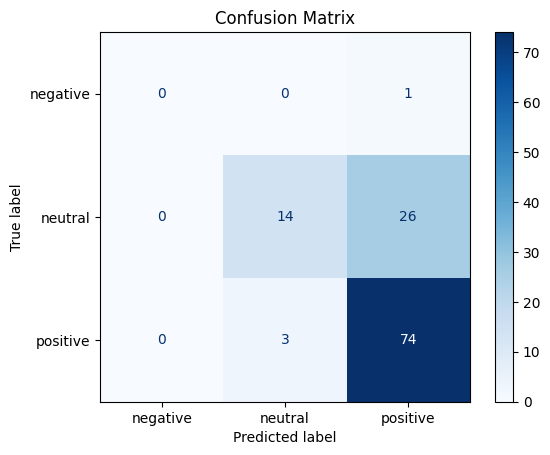

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# K-Fold Cross Validation (optional)
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("K-Fold Accuracy Scores:", cv_scores)
print("Rata-rata Akurasi K-Fold:", cv_scores.mean())

K-Fold Accuracy Scores: [0.66101695 0.66101695 0.75423729 0.73728814 0.68376068]
Rata-rata Akurasi K-Fold: 0.6994640011589166


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== Logistic Regression ===
Akurasi  : 0.7458
Precision: 0.7573
Recall   : 0.7458
F1-score : 0.7091



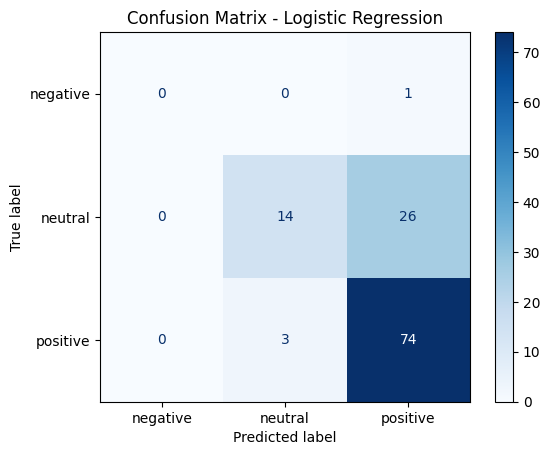

=== Naive Bayes ===
Akurasi  : 0.6949
Precision: 0.7836
Recall   : 0.6949
F1-score : 0.6042



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


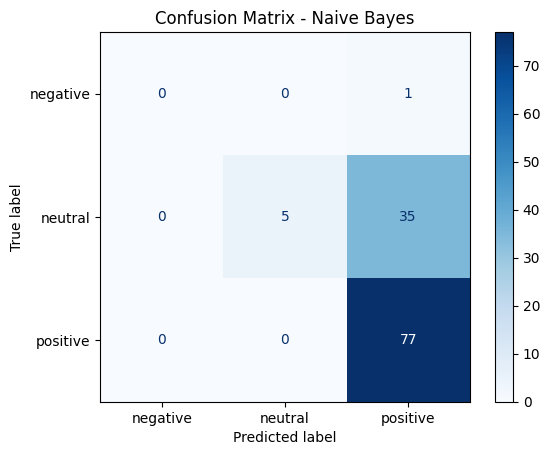

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== Support Vector Machine ===
Akurasi  : 0.7881
Precision: 0.7775
Recall   : 0.7881
F1-score : 0.7803



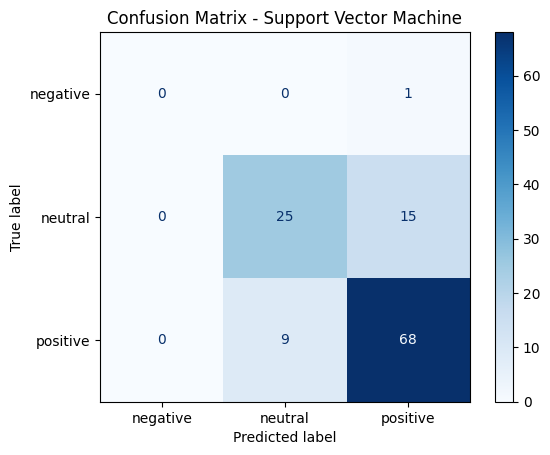

In [ ]:
# Import library tambahan
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# ==================================
# Tetap pakai bagian awal (import, load dataset, preprocessing, TF-IDF, train-test split)
# ==================================

# Ubah teks menjadi vektor angka
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==================================
# Fungsi evaluasi
# ==================================
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"=== {name} ===")
    print(f"Akurasi  : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_ if hasattr(model, 'classes_') else np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ if hasattr(model, 'classes_') else np.unique(y_test))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# ==================================
# 1. Logistic Regression
# ==================================
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, "Logistic Regression")

# ==================================
# 2. Naive Bayes
# ==================================
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
evaluate_model(nb_model, "Naive Bayes")

# ==================================
# 3. Support Vector Machine
# ==================================
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, "Support Vector Machine")
